<h1>Identifying Early Stages of Gentrification in Amsterdam</h1>

<h3>A usecase exercise using the Foursquare API and Clustering</h3>

This notebook is further accompanied by a research paper, further specifing the actions taken and elaborating the reasons for the decisions made during the analysis. For a quick high level summary the notebook and research paper are accompanied by a presentation summarizing the findings.
   
<b>Research question:</b>  
This analysis seeks to establish which areas of Amsterdam are currently likely to be in the early stages of gentrification. The analysis provided in this paper is meant to provide a preliminary analysis that can provide guidance as to which districts of Amsterdam to focus on for a more in-depth analysis, based on which investors, politicians and social society groups then can make further decisions.




Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import json

import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Libraries imported.


<h3>Import the necessary data</h3>

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
df_ams_coord = pd.read_csv(body_coord)
df_ams_coord

,District,latitude,longitude,radius
0,DX01 Centrum-West,52.3750,4.8877,700.0
1,DX02 Centrum-Oost,52.3669,4.9070,700.0
2,DX03 Westerpark,52.3851,4.8625,1500.0
3,DX04 Bos en Lommer,52.3843,4.8513,1000.0
4,"DX05 Oud-West, De Baarsjes",52.3665,4.8621,1000.0
5,"DX06 Geuzenveld, Slotermeer, Sloterdijken",52.3842,4.8008,2700.0
6,DX07 Osdorp,52.3609,4.7906,3000.0
7,"DX08 De Aker, Sloten, Nieuw-Sloten",52.3413,4.8110,1200.0
8,DX09 Slotervaart,52.3578,4.8338,1000.0
9,DX10 Oud-Zuid,52.3521,4.8660,1200.0


In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
df_prop_prices = pd.read_csv(body_prices)
df_prop_prices

,district,2017 gemiddelde WOZ-waarde,2017 WOZ-waarde per m2,2018 gemiddelde WOZ-waarde,2018 WOZ-waarde per m2,2019 gemiddelde WOZ-waarde,2019 WOZ-waarde per m2
0,DX01 Centrum-West,405363,5406,462767,6120,499226,6518
1,DX02 Centrum-Oost,415613,5023,475689,5649,522072,6097
2,DX03 Westerpark,277899,4467,336380,5330,364092,5738
3,DX04 Bos en Lommer,229299,3772,278800,4533,303575,4929
4,"DX05 Oud-West, De Baarsjes",305518,4661,364909,5522,400312,5974
5,"DX06 Geuzenveld, Slotermeer, Sloterdijken",170898,2456,202575,2957,232065,3284
6,DX07 Osdorp,190176,2329,215861,2630,244801,2978
7,"DX08 De Aker, Sloten, Nieuw-Sloten",293648,2723,331616,3079,363093,3379
8,DX09 Slotervaart,211127,2762,236540,3253,277565,3757
9,DX10 Oud-Zuid,539869,5364,623837,6145,690488,6592


<h3>Cleaning the data</h3>

<b>Cleaning the Amsterdam coordinates data.</b>

Westpoort is an industrial habour area in Amsterdam without residential property. Hence the NaN value in the property prices data.

The data for Westpoort will be dropped as including an exclusively industrial area does not add any value for research on gentrification of residential areas. (Also, the foursquare API only returns 4 venues for Westpoort.)

In [7]:
df_ams_coord.drop(22,axis=0,inplace=True)
df_ams_coord

,District,latitude,longitude,radius
0,DX01 Centrum-West,52.3750,4.8877,700.0
1,DX02 Centrum-Oost,52.3669,4.9070,700.0
2,DX03 Westerpark,52.3851,4.8625,1500.0
3,DX04 Bos en Lommer,52.3843,4.8513,1000.0
4,"DX05 Oud-West, De Baarsjes",52.3665,4.8621,1000.0
5,"DX06 Geuzenveld, Slotermeer, Sloterdijken",52.3842,4.8008,2700.0
6,DX07 Osdorp,52.3609,4.7906,3000.0
7,"DX08 De Aker, Sloten, Nieuw-Sloten",52.3413,4.8110,1200.0
8,DX09 Slotervaart,52.3578,4.8338,1000.0
9,DX10 Oud-Zuid,52.3521,4.8660,1200.0


<b>Cleaning the poperty price data.</b>

In [8]:
#drop NaN
df_prop_prices.replace(".", np.NaN, inplace=True)
df_prop_prices=df_prop_prices.dropna()
print('df_prop_prices.shape: ', df_prop_prices.shape)

df_prop_prices.shape:  (22, 7)


In [9]:
#rename columns
columns_translated=['district','avg property price 2017', 'avg property price per sqm 2017',
                    'avg property price 2018', 'avg property price per sqm 2018',
                    'avg property price 2019', 'avg property price per sqm 2019',]
df_prop_prices.columns=[columns_translated]
df_prop_prices.head()

,district,avg property price 2017,avg property price per sqm 2017,avg property price 2018,avg property price per sqm 2018,avg property price 2019,avg property price per sqm 2019
0,DX01 Centrum-West,405363,5406,462767,6120,499226,6518
1,DX02 Centrum-Oost,415613,5023,475689,5649,522072,6097
2,DX03 Westerpark,277899,4467,336380,5330,364092,5738
3,DX04 Bos en Lommer,229299,3772,278800,4533,303575,4929
4,"DX05 Oud-West, De Baarsjes",305518,4661,364909,5522,400312,5974


While amending the column labels, I noticed that they have been imported as MultiIndex. While they do lend themselves for multi index operations, for the analysis performed in this notebook, I would prefer to flatten the index.

In [10]:
prop_columns=df_prop_prices.columns
prop_columns

MultiIndex(levels=[['avg property price 2017', 'avg property price 2018', 'avg property price 2019', 'avg property price per sqm 2017', 'avg property price per sqm 2018', 'avg property price per sqm 2019', 'district']],
           codes=[[6, 0, 3, 1, 4, 2, 5]])

In [11]:
df_prop_prices= df_prop_prices.reset_index()
df_prop_prices[columns_translated] = df_prop_prices[columns_translated].astype(str)

In [12]:
df_prop_prices.columns = df_prop_prices.columns.get_level_values(0)

Convert integers that have been imported as strings back to integer

In [13]:
df_prop_prices.dtypes

index                               int64
district                           object
avg property price 2017            object
avg property price per sqm 2017    object
avg property price 2018            object
avg property price per sqm 2018    object
avg property price 2019            object
avg property price per sqm 2019    object
dtype: object

In [14]:
int_list=['avg property price 2017', 'avg property price 2018', 'avg property price 2019',
          'avg property price per sqm 2017', 'avg property price per sqm 2018', 'avg property price per sqm 2019']
df_prop_prices[int_list]=df_prop_prices[(int_list)].astype(int)
df_prop_prices.dtypes

index                               int64
district                           object
avg property price 2017             int64
avg property price per sqm 2017     int64
avg property price 2018             int64
avg property price per sqm 2018     int64
avg property price 2019             int64
avg property price per sqm 2019     int64
dtype: object

In order to make the property value data more readable and usable, it will be split into two dataframes. One dataframe with average property prices and one with average property prices per square metre.

In [15]:
df_avg_price=df_prop_prices[['district','avg property price 2017','avg property price 2018','avg property price 2019']]
df_avg_price.head()

,district,avg property price 2017,avg property price 2018,avg property price 2019
0,DX01 Centrum-West,405363,462767,499226
1,DX02 Centrum-Oost,415613,475689,522072
2,DX03 Westerpark,277899,336380,364092
3,DX04 Bos en Lommer,229299,278800,303575
4,"DX05 Oud-West, De Baarsjes",305518,364909,400312


In [16]:
df_price_sqm=df_prop_prices[['district','avg property price per sqm 2017','avg property price per sqm 2018',
                             'avg property price per sqm 2019',]]
df_price_sqm.head()

,district,avg property price per sqm 2017,avg property price per sqm 2018,avg property price per sqm 2019
0,DX01 Centrum-West,5406,6120,6518
1,DX02 Centrum-Oost,5023,5649,6097
2,DX03 Westerpark,4467,5330,5738
3,DX04 Bos en Lommer,3772,4533,4929
4,"DX05 Oud-West, De Baarsjes",4661,5522,5974


<b>Getting and preparing the venue data from FourSquare</b>

Establish Foursquare credentials (hidden cell below) in order to import venue data from Foursquare

In [17]:
# The code was removed by Watson Studio for sharing.

Define Foursquare version and limit

In [18]:
VERSION = '20191212'
limit = 200

Define function that gets venues in the area

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes, radius):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



Get venues for the districts of Amsterdam

In [20]:
ams_venues = getNearbyVenues(names=df_ams_coord['District'],
                             latitudes=df_ams_coord['latitude'],
                             longitudes=df_ams_coord['longitude'],
                             radius=df_ams_coord['radius'])
ams_venues.head()


DX01 Centrum-West
DX02 Centrum-Oost
DX03 Westerpark
DX04 Bos en Lommer
DX05 Oud-West, De Baarsjes
DX06 Geuzenveld, Slotermeer, Sloterdijken
DX07 Osdorp
DX08 De Aker, Sloten, Nieuw-Sloten
DX09 Slotervaart
DX10 Oud-Zuid
DX11 Buitenveldert, Zuidas
DX12 De Pijp, Rivierenbuurt
DX13 Oud-Oost
DX14 Indische Buurt, Oostelijk Havengebied
DX15 Watergraafsmeer
DX16 Ijburg, Zeeburgereiland
DX17 Noord-West
DX18 Oud-Noord
DX19 Noord-Oost
DX20 Bijlmer-Centrum, Amstel III
DX21 Bijlmer-Oost
DX22 Gaasperdam, Driemond


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,DX01 Centrum-West,52.375,4.8877,Proeflokaal Arendsnest,52.376769,4.889399,Beer Bar
1,DX01 Centrum-West,52.375,4.8877,Caffè Il Momento,52.374682,4.889018,Café
2,DX01 Centrum-West,52.375,4.8877,Grey Area Coffeeshop,52.374641,4.888839,Marijuana Dispensary
3,DX01 Centrum-West,52.375,4.8877,Canal House,52.376261,4.886339,Hotel
4,DX01 Centrum-West,52.375,4.8877,Restaurant Breda,52.373818,4.888610,Restaurant


In [21]:
ams_venues.shape

(1639, 7)

Get an overview of how many venues there are per district and how many unique venue categories there are in the data set.

In [22]:
ams_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
DX01 Centrum-West,100,100,100,100,100,100
DX02 Centrum-Oost,100,100,100,100,100,100
DX03 Westerpark,100,100,100,100,100,100
DX04 Bos en Lommer,79,79,79,79,79,79
"DX05 Oud-West, De Baarsjes",100,100,100,100,100,100
"DX06 Geuzenveld, Slotermeer, Sloterdijken",81,81,81,81,81,81
DX07 Osdorp,100,100,100,100,100,100
"DX08 De Aker, Sloten, Nieuw-Sloten",35,35,35,35,35,35
DX09 Slotervaart,49,49,49,49,49,49


In [23]:
print('There are {} unique categories.'.format(len(ams_venues['Venue Category'].unique())))

There are 263 unique categories.


Have a closer look at clusters with 25 venues or less. During later steps of the analysis a dataframe showing the 10 most common venues for each district will be created. If any district has less than 10 unique venue categories the data displayed in that dataframe would be invalid. This is due to the method used (sort in descending order and display the first 10 values).

In [24]:
venue_check_NW=ams_venues.loc[ams_venues['District']=='DX17 Noord-West']
venue_check_NW

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1335,DX17 Noord-West,52.4136,4.8996,Kebec Micro Bakery,52.403495,4.892019,Pizza Place
1336,DX17 Noord-West,52.4136,4.8996,NDSM Werf (NDSM werf),52.400193,4.893293,Harbor / Marina
1337,DX17 Noord-West,52.4136,4.8996,Loetje aan 't IJ,52.402857,4.885865,Steakhouse
1338,DX17 Noord-West,52.4136,4.8996,Blast Galaxy,52.404657,4.890643,Arcade
1339,DX17 Noord-West,52.4136,4.8996,NDSM Kunststad - Scheepsbouwloods,52.401163,4.895995,Coworking Space
1340,DX17 Noord-West,52.4136,4.8996,Noorderlicht,52.399570,4.896689,Café
1341,DX17 Noord-West,52.4136,4.8996,IJver,52.401278,4.896307,Bistro
1342,DX17 Noord-West,52.4136,4.8996,Pllek,52.399029,4.893160,Gastropub
1343,DX17 Noord-West,52.4136,4.8996,NDSM Art Warp,52.401219,4.895825,Art Gallery
1344,DX17 Noord-West,52.4136,4.8996,Biker Outfit,52.411667,4.881568,Motorcycle Shop


In [25]:
venue_check_BO=ams_venues.loc[ams_venues['District']=='DX21 Bijlmer-Oost']
venue_check_BO

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1582,DX21 Bijlmer-Oost,52.3194,4.9756,De Smeltkroes,52.322755,4.974752,South American Restaurant
1583,DX21 Bijlmer-Oost,52.3194,4.9756,Kruidvat,52.322051,4.971088,Drugstore
1584,DX21 Bijlmer-Oost,52.3194,4.9756,Meram Zuidoost,52.322668,4.974577,Turkish Restaurant
1585,DX21 Bijlmer-Oost,52.3194,4.9756,Action,52.316434,4.978409,Discount Store
1586,DX21 Bijlmer-Oost,52.3194,4.9756,Albert Heijn,52.316632,4.978925,Supermarket
1587,DX21 Bijlmer-Oost,52.3194,4.9756,De Kameleon,52.316285,4.977767,Shopping Mall
1588,DX21 Bijlmer-Oost,52.3194,4.9756,Albert Heijn,52.322735,4.972008,Supermarket
1589,DX21 Bijlmer-Oost,52.3194,4.9756,Metrostation Kraaiennest,52.316897,4.979103,Metro Station
1590,DX21 Bijlmer-Oost,52.3194,4.9756,Bakkerij Ganzenpoort,52.322487,4.972989,Bakery
1591,DX21 Bijlmer-Oost,52.3194,4.9756,Snackbar Ganzenpoort,52.322579,4.973242,Snack Place


Both districts, Noord-West and Bijlmer-Oost have sufficient unique venue categories for the methods and functions used to yield a valid result.

Use one hot encoding to prepare the data for clustering.

In [26]:
# one hot encoding
ams_onehot = pd.get_dummies(ams_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ams_onehot['District'] = ams_venues['District'] 

# move neighborhood column to the first column
fixed_columns = list(ams_onehot.columns)
fixed_columns.remove('District')
fixed_columns.insert(0,'District')
ams_onehot = ams_onehot[fixed_columns]

ams_onehot.head()

,District,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Tunnel,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,DX01 Centrum-West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DX01 Centrum-West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DX01 Centrum-West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DX01 Centrum-West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DX01 Centrum-West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
ams_onehot.shape

(1639, 264)

Group the data by district and provide a mean value for each venue present in the district.

In [28]:
ams_grouped = ams_onehot.groupby('District').mean().reset_index()
ams_grouped.head(10)

,District,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Tunnel,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,DX01 Centrum-West,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
1,DX02 Centrum-Oost,0.0,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.00,...,0.000000,0.010000,0.0,0.000000,0.00,0.00,0.000000,0.01,0.01,0.03
2,DX03 Westerpark,0.0,0.0,0.00,0.00,0.0,0.0,0.01,0.0,0.00,...,0.000000,0.010000,0.0,0.010000,0.00,0.01,0.000000,0.01,0.00,0.00
3,DX04 Bos en Lommer,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.025316,0.0,0.025316,0.00,0.00,0.000000,0.00,0.00,0.00
4,"DX05 Oud-West, De Baarsjes",0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.010000,0.01,0.01,0.000000,0.05,0.00,0.00
5,"DX06 Geuzenveld, Slotermeer, Sloterdijken",0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.012346,0.061728,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
6,DX07 Osdorp,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.070000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
7,"DX08 De Aker, Sloten, Nieuw-Sloten",0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.028571,0.00,0.00,0.00
8,DX09 Slotervaart,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
9,DX10 Oud-Zuid,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.01,...,0.000000,0.000000,0.0,0.010000,0.00,0.00,0.020000,0.01,0.00,0.00


In [29]:
ams_grouped.shape

(22, 264)

Define a function that returns a specified number of the most common venues in a given district.

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a dataframe that shows the 10 most common venues per district. 

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ams_venues_sorted = pd.DataFrame(columns=columns)
ams_venues_sorted['District'] =ams_grouped['District']

for ind in np.arange(ams_grouped.shape[0]):
    ams_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ams_grouped.iloc[ind, :], num_top_venues)

ams_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,DX01 Centrum-West,Bar,Hotel,Café,Marijuana Dispensary,Gift Shop,Coffee Shop,French Restaurant,Thai Restaurant,Steakhouse,Indian Restaurant
1,DX02 Centrum-Oost,Bar,Hotel,Restaurant,Coffee Shop,Zoo Exhibit,Breakfast Spot,Pizza Place,Bagel Shop,Italian Restaurant,Record Shop
2,DX03 Westerpark,Coffee Shop,Restaurant,Nightclub,Café,Italian Restaurant,Bar,Hotel,Pizza Place,Bakery,Seafood Restaurant
3,DX04 Bos en Lommer,Restaurant,Hotel,Supermarket,Bakery,Tram Station,Café,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Turkish Restaurant,Bar
4,"DX05 Oud-West, De Baarsjes",Coffee Shop,Restaurant,Yoga Studio,Italian Restaurant,Bar,Grocery Store,Dance Studio,Dutch Restaurant,Indonesian Restaurant,Burger Joint


<h3>Data Analysis</h3>

Use the elbow method to find the best k for Clustering

In [32]:
#drop 'District' column in order to prepare the data set for clustering
ams_grouped_clustering = ams_grouped.drop('District', 1)

In [33]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ams_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

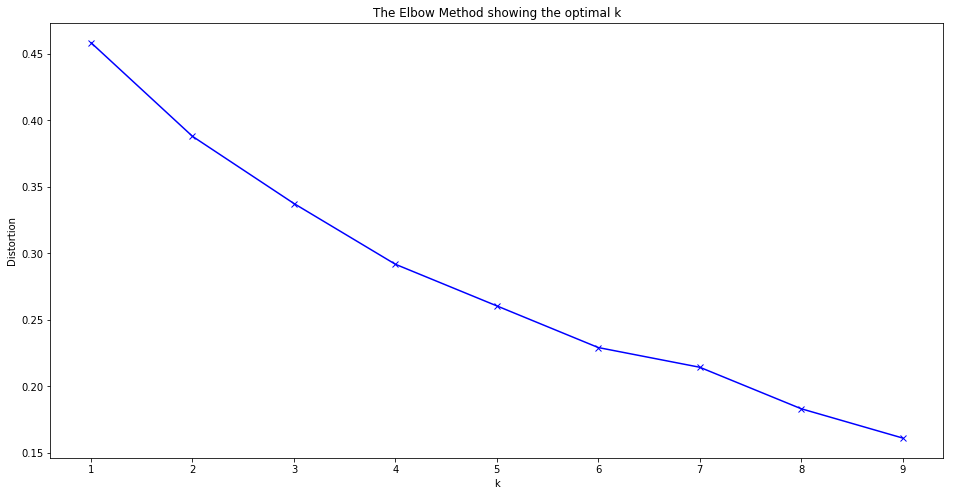

In [34]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The graph is somewhat inconclusive. Looking at the research question, it seems preferable to have 5 clusters, in order to be able to distinguish between gentrified districts, not gentrified districts and  districts that are currently gentrifying and that may be found to be in different stages of the gentrification process. Thus k=5 is chosen for the k-Means clustering algorithm.

Use KMeans to cluster the districts.

In [35]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ams_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

Create a dataframe with District, Cluster Label and 10 most common venues.

In [36]:
# add clustering labels
ams_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ams_merged = df_ams_coord

ams_merged = ams_merged.join(ams_venues_sorted.set_index('District'), on='District')

ams_merged.head()

,District,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,DX01 Centrum-West,52.3750,4.8877,700.0,0,Bar,Hotel,Café,Marijuana Dispensary,Gift Shop,Coffee Shop,French Restaurant,Thai Restaurant,Steakhouse,Indian Restaurant
1,DX02 Centrum-Oost,52.3669,4.9070,700.0,0,Bar,Hotel,Restaurant,Coffee Shop,Zoo Exhibit,Breakfast Spot,Pizza Place,Bagel Shop,Italian Restaurant,Record Shop
2,DX03 Westerpark,52.3851,4.8625,1500.0,0,Coffee Shop,Restaurant,Nightclub,Café,Italian Restaurant,Bar,Hotel,Pizza Place,Bakery,Seafood Restaurant
3,DX04 Bos en Lommer,52.3843,4.8513,1000.0,1,Restaurant,Hotel,Supermarket,Bakery,Tram Station,Café,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Turkish Restaurant,Bar
4,"DX05 Oud-West, De Baarsjes",52.3665,4.8621,1000.0,0,Coffee Shop,Restaurant,Yoga Studio,Italian Restaurant,Bar,Grocery Store,Dance Studio,Dutch Restaurant,Indonesian Restaurant,Burger Joint


In [37]:
ams_merged.shape

(22, 15)

Just checking to confirm that there are no missing values.

In [38]:
na_table=pd.DataFrame(ams_merged['Cluster Labels'].isnull())
na_table.groupby('Cluster Labels').size()

Cluster Labels
False    22
dtype: int64

Visualize the clusters on a map of Amsterdam.

In [39]:
#define Amsterdam coordinates
latitude= 52.3667
longitude= 4.8945

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ams_merged['latitude'], ams_merged['longitude'], ams_merged['District'], ams_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Look at each cluster individually.

In [40]:
ams_merged.loc[ams_merged['Cluster Labels'] == 0, ams_merged.columns[[0] + list(range(5, ams_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,DX01 Centrum-West,Bar,Hotel,Café,Marijuana Dispensary,Gift Shop,Coffee Shop,French Restaurant,Thai Restaurant,Steakhouse,Indian Restaurant
1,DX02 Centrum-Oost,Bar,Hotel,Restaurant,Coffee Shop,Zoo Exhibit,Breakfast Spot,Pizza Place,Bagel Shop,Italian Restaurant,Record Shop
2,DX03 Westerpark,Coffee Shop,Restaurant,Nightclub,Café,Italian Restaurant,Bar,Hotel,Pizza Place,Bakery,Seafood Restaurant
4,"DX05 Oud-West, De Baarsjes",Coffee Shop,Restaurant,Yoga Studio,Italian Restaurant,Bar,Grocery Store,Dance Studio,Dutch Restaurant,Indonesian Restaurant,Burger Joint
9,DX10 Oud-Zuid,Restaurant,Hotel,Coffee Shop,Bistro,Bakery,Italian Restaurant,Breakfast Spot,Pizza Place,Café,Ethiopian Restaurant
11,"DX12 De Pijp, Rivierenbuurt",Coffee Shop,Japanese Restaurant,Italian Restaurant,Café,Pizza Place,Yoga Studio,Breakfast Spot,Indonesian Restaurant,Deli / Bodega,Ice Cream Shop
12,DX13 Oud-Oost,Restaurant,Italian Restaurant,Hotel,Bar,Café,Coffee Shop,Bakery,Gym / Fitness Center,French Restaurant,Vegetarian / Vegan Restaurant
13,"DX14 Indische Buurt, Oostelijk Havengebied",Coffee Shop,Supermarket,Café,Italian Restaurant,Restaurant,Fish Market,Plaza,Bakery,Bar,Bookstore
14,DX15 Watergraafsmeer,Hotel,Soccer Field,French Restaurant,Café,Restaurant,Italian Restaurant,Coffee Shop,Park,Stadium,Convenience Store
17,DX18 Oud-Noord,Restaurant,Café,Coffee Shop,Bar,Hotel,Park,Italian Restaurant,Art Gallery,Asian Restaurant,Theme Park Ride / Attraction


In [41]:
ams_merged.loc[ams_merged['Cluster Labels'] == 1, ams_merged.columns[[0] + list(range(5, ams_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,DX04 Bos en Lommer,Restaurant,Hotel,Supermarket,Bakery,Tram Station,Café,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Turkish Restaurant,Bar
5,"DX06 Geuzenveld, Slotermeer, Sloterdijken",Hotel,Turkish Restaurant,Soccer Field,Park,Supermarket,Furniture / Home Store,Recreation Center,Train Station,Dessert Shop,Coffee Shop
6,DX07 Osdorp,Turkish Restaurant,Supermarket,Restaurant,Grocery Store,Hotel,Gym / Fitness Center,Park,Dessert Shop,Chinese Restaurant,Indonesian Restaurant
7,"DX08 De Aker, Sloten, Nieuw-Sloten",Café,Bus Stop,Flower Shop,Hotel,History Museum,Drugstore,Pub,Beach,Racetrack,Supermarket
8,DX09 Slotervaart,Supermarket,Hotel,Chinese Restaurant,Plaza,Asian Restaurant,Tram Station,Metro Station,Coffee Shop,Gym,Sandwich Place
10,"DX11 Buitenveldert, Zuidas",Hotel,Bakery,Gym / Fitness Center,Gym,Restaurant,Breakfast Spot,Supermarket,Park,Flower Shop,Bookstore
15,"DX16 Ijburg, Zeeburgereiland",Harbor / Marina,Park,Tram Station,Restaurant,Farmers Market,Coffee Shop,Italian Restaurant,Ice Cream Shop,Shopping Mall,Supermarket
18,DX19 Noord-Oost,Supermarket,Bakery,Clothing Store,Gym / Fitness Center,Discount Store,Seafood Restaurant,Fried Chicken Joint,Sports Club,Market,Medical Center
19,"DX20 Bijlmer-Centrum, Amstel III",Hotel,Platform,Soccer Field,Music Venue,Restaurant,Café,Coffee Shop,Soccer Stadium,Office,Concert Hall


In [42]:
ams_merged.loc[ams_merged['Cluster Labels'] == 2, ams_merged.columns[[0] + list(range(5, ams_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,DX21 Bijlmer-Oost,Bakery,Bus Stop,Supermarket,Park,Food & Drink Shop,Shopping Mall,Drugstore,Moving Target,Discount Store,Snack Place


In [43]:
ams_merged.loc[ams_merged['Cluster Labels'] == 3, ams_merged.columns[[0] + list(range(5, ams_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"DX22 Gaasperdam, Driemond",Coffee Shop,Snack Place,Pizza Place,Shopping Mall,Metro Station,Soccer Field,Bus Station,Supermarket,Chinese Restaurant,Park


In [44]:
ams_merged.loc[ams_merged['Cluster Labels'] == 4, ams_merged.columns[[0] + list(range(5, ams_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,DX17 Noord-West,Steakhouse,Restaurant,Pizza Place,Diner,Motorcycle Shop,Coworking Space,Soccer Field,Snack Place,Bistro,Café


<h4>Prepare the data to combine the found cluster data with property price data in order to determine if these are correlated.</h4>

Create a data frame with District, Cluster Labels and property prices (for both, average and per sqm, in separate dataframes).

In [45]:
df_price_sqm.rename(columns={'district':'District'}, inplace=True)
ams_merged_sqm=pd.merge(ams_merged, df_price_sqm, how='inner', on='District')
ams_merged_sqm.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,District,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,avg property price per sqm 2017,avg property price per sqm 2018,avg property price per sqm 2019
0,DX01 Centrum-West,52.3750,4.8877,700.0,0,Bar,Hotel,Café,Marijuana Dispensary,Gift Shop,Coffee Shop,French Restaurant,Thai Restaurant,Steakhouse,Indian Restaurant,5406,6120,6518
1,DX02 Centrum-Oost,52.3669,4.9070,700.0,0,Bar,Hotel,Restaurant,Coffee Shop,Zoo Exhibit,Breakfast Spot,Pizza Place,Bagel Shop,Italian Restaurant,Record Shop,5023,5649,6097
2,DX03 Westerpark,52.3851,4.8625,1500.0,0,Coffee Shop,Restaurant,Nightclub,Café,Italian Restaurant,Bar,Hotel,Pizza Place,Bakery,Seafood Restaurant,4467,5330,5738
3,DX04 Bos en Lommer,52.3843,4.8513,1000.0,1,Restaurant,Hotel,Supermarket,Bakery,Tram Station,Café,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Turkish Restaurant,Bar,3772,4533,4929
4,"DX05 Oud-West, De Baarsjes",52.3665,4.8621,1000.0,0,Coffee Shop,Restaurant,Yoga Studio,Italian Restaurant,Bar,Grocery Store,Dance Studio,Dutch Restaurant,Indonesian Restaurant,Burger Joint,4661,5522,5974


In [46]:
ams_merged_sqm.columns

Index(['District', 'latitude', 'longitude', 'radius', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       'avg property price per sqm 2017', 'avg property price per sqm 2018',
       'avg property price per sqm 2019'],
      dtype='object')

In [47]:
ams_merged_sqm=ams_merged_sqm[['District', 'Cluster Labels',
       'avg property price per sqm 2019']]
ams_merged_sqm.set_index('District',drop=True,inplace=True)
ams_merged_sqm.head()

,Cluster Labels,avg property price per sqm 2019
District,,
DX01 Centrum-West,0,6518
DX02 Centrum-Oost,0,6097
DX03 Westerpark,0,5738
DX04 Bos en Lommer,1,4929
"DX05 Oud-West, De Baarsjes",0,5974


In [48]:
df_avg_price.rename(columns={'district':'District'}, inplace=True)
ams_merged_price=pd.merge(ams_merged, df_avg_price, how='inner', on='District')
ams_merged_price.head()

,District,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,avg property price 2017,avg property price 2018,avg property price 2019
0,DX01 Centrum-West,52.3750,4.8877,700.0,0,Bar,Hotel,Café,Marijuana Dispensary,Gift Shop,Coffee Shop,French Restaurant,Thai Restaurant,Steakhouse,Indian Restaurant,405363,462767,499226
1,DX02 Centrum-Oost,52.3669,4.9070,700.0,0,Bar,Hotel,Restaurant,Coffee Shop,Zoo Exhibit,Breakfast Spot,Pizza Place,Bagel Shop,Italian Restaurant,Record Shop,415613,475689,522072
2,DX03 Westerpark,52.3851,4.8625,1500.0,0,Coffee Shop,Restaurant,Nightclub,Café,Italian Restaurant,Bar,Hotel,Pizza Place,Bakery,Seafood Restaurant,277899,336380,364092
3,DX04 Bos en Lommer,52.3843,4.8513,1000.0,1,Restaurant,Hotel,Supermarket,Bakery,Tram Station,Café,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Turkish Restaurant,Bar,229299,278800,303575
4,"DX05 Oud-West, De Baarsjes",52.3665,4.8621,1000.0,0,Coffee Shop,Restaurant,Yoga Studio,Italian Restaurant,Bar,Grocery Store,Dance Studio,Dutch Restaurant,Indonesian Restaurant,Burger Joint,305518,364909,400312


In [49]:
ams_merged_price.columns

Index(['District', 'latitude', 'longitude', 'radius', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       'avg property price 2017', 'avg property price 2018',
       'avg property price 2019'],
      dtype='object')

In [50]:
ams_merged_price=ams_merged_price[['District', 'Cluster Labels',
       'avg property price 2019']]
ams_merged_price.set_index('District',drop=True,inplace=True)
ams_merged_price.head()

,Cluster Labels,avg property price 2019
District,,
DX01 Centrum-West,0,499226
DX02 Centrum-Oost,0,522072
DX03 Westerpark,0,364092
DX04 Bos en Lommer,1,303575
"DX05 Oud-West, De Baarsjes",0,400312


Calculate Pearson's correlation and the corresponding p-value.

In [51]:
#define a function that returns the p-value
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

Use lamda x: x.factorize to create a numerical representation of the categorical values and then apply .corr() to find correlation between cluster label and average property price per square metre in 2019.

In [52]:
ams_merged_sqm.apply(lambda x: x.factorize()[0]).corr()

,Cluster Labels,avg property price per sqm 2019
Cluster Labels,1.000000,0.543346
avg property price per sqm 2019,0.543346,1.000000


Find the p-value to determine the significance of the correlation.

In [53]:
corr_sqm = ams_merged_sqm.corr(method=pearsonr_pval)
corr_sqm

,Cluster Labels,avg property price per sqm 2019
Cluster Labels,1.000000,0.000311
avg property price per sqm 2019,0.000311,1.000000


Use lamda x: x.factorize to create a numerical representation of the categorical values and then apply .corr() to find the correlation between cluster label and average property price in 2019.

In [54]:
ams_merged_price.apply(lambda x: x.factorize()[0]).corr()

,Cluster Labels,avg property price 2019
Cluster Labels,1.000000,0.543346
avg property price 2019,0.543346,1.000000


Find the p-value to determine the significance of the correlation.

In [55]:
corr_price = ams_merged_price.corr(method=pearsonr_pval)
corr_price

,Cluster Labels,avg property price 2019
Cluster Labels,1.000000,0.008523
avg property price 2019,0.008523,1.000000


Now that significant correlation was found for both cases, property price data per cluster label will be looked at in more detail.
To get a better overview, create dataframes with average property price per cluster, sorted in decending order.

In [56]:
sqm_grouped=ams_merged_sqm.groupby('Cluster Labels').mean().round(0).astype(int).sort_values(by=['avg property price per sqm 2019'], ascending=False)
sqm_grouped

,avg property price per sqm 2019
Cluster Labels,
0,5703
1,3665
4,3416
3,2613
2,2444


In [57]:
avg_grouped=ams_merged_price.groupby('Cluster Labels').mean().round(0).astype(int).sort_values(by=['avg property price 2019'], ascending=False)
avg_grouped

,avg property price 2019
Cluster Labels,
0,435974
1,303757
4,280830
2,215199
3,211503


Having looked at both, the most common venues of the clusters and the average property prices per cluster, cluster 1 and 4 have been identified to be currently gentrifying. As stated in the research question, it is the goal of this analysis to identify districts of Amsterdam that are currently likely to be in the early stages of gentrification.  

Now that cluster 1 and 4 have been identified to be probably gentrifying or in early stages of gentrification, a dataframe with property prices per district (rather than just per cluster) can provide further guidance.

In [58]:
clus_1_avg=ams_merged_price.loc[ams_merged_price['Cluster Labels'] == 1]
clus_1_avg=clus_1_avg.append(ams_merged_price.loc[ams_merged_price['Cluster Labels']==4]).sort_values(by=['avg property price 2019'], ascending = False)
clus_1_avg

,Cluster Labels,avg property price 2019
District,,
"DX11 Buitenveldert, Zuidas",1,434370
"DX16 Ijburg, Zeeburgereiland",1,417221
"DX08 De Aker, Sloten, Nieuw-Sloten",1,363093
DX04 Bos en Lommer,1,303575
DX19 Noord-Oost,1,281950
DX17 Noord-West,4,280830
DX09 Slotervaart,1,277565
DX07 Osdorp,1,244801
"DX06 Geuzenveld, Slotermeer, Sloterdijken",1,232065


In [59]:
clus_1_sqm=ams_merged_sqm.loc[ams_merged_sqm['Cluster Labels'] == 1]
clus_1_sqm=clus_1_sqm.append(ams_merged_sqm.loc[ams_merged_sqm['Cluster Labels']==4]).sort_values(by=['avg property price per sqm 2019'], ascending=False)
clus_1_sqm

,Cluster Labels,avg property price per sqm 2019
District,,
DX04 Bos en Lommer,1,4929
"DX11 Buitenveldert, Zuidas",1,4709
"DX16 Ijburg, Zeeburgereiland",1,4072
DX09 Slotervaart,1,3757
DX17 Noord-West,4,3416
"DX08 De Aker, Sloten, Nieuw-Sloten",1,3379
DX19 Noord-Oost,1,3312
"DX06 Geuzenveld, Slotermeer, Sloterdijken",1,3284
DX07 Osdorp,1,2978


<b>Conclusion</b>  
  
This analysis set out to identify which areas of Amsterdam are currently likely to be in the early stages of gentrification. This exploratory analysis found that the districts of ‘Bos en Lommer’, ‘Buitenveldert, Zuidas’, ‘IJburg, Zeeburgereiland’, ‘Slotervaart’, ‘Noord-West’, ‘De Aker, Sloten, Nieuw-Sloten’, ‘Noord-Oost’, ‘Geuzenveld, Slotermeer, Sloterdijken’, ‘Osdorp’ and ‘Bijlmer-Centrum, Amstel III’ can be categorized as districts that are currently gentrifying. Within this group, a rather wide range of property values can still be found. This list of 10 districts does narrow down the area to focus on for investors or political parties and social society groups. Together with the property prices and table of most common venues provided in this notebook, they can further narrow down the area of their interest, depending on their specific goal. Furthermore, the group of 10 districts, identified in this notebook, can be used as pre-selection for further research into the nature, mechanisms and current progress of the gentrification currently taking place, as well as research on the social effects and consequences of the ongoing gentrification.  
  
Please refer to the paper and presentation accompanying this notebook for further details on the methodology, reasoning on decisions made and an elaboration of results.